# First model

This model is the simplest possible model we can think of. Inputs will be the list of points delimiting the bone and tooth area and their squares and cross-products to account for second order contributions.

The outputs will be the coordinates of optimal axe.

The cost function is the distance of the two points. 

## First step: load and prepare the datasets

Loads the datasets prepared by the `dataset_gen` notebook, then prepare the input by appending all the cross-products.

In [16]:
import pandas as pd
from utils import datadir

input_dataset = pd.read_pickle(datadir("input_rot.pkl"))
output_dataset = pd.read_pickle(datadir("output_rot.pkl"))

In [17]:
input_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.516425,1.904407,2.830124,-1.441737,1.326225,-2.493799,-1.174322,0.549347,-0.698353,3.384424,0.434217,1.870214,-1.092114,0.583540,-2.366667,2.263976
1,0.190749,2.636898,1.990407,-1.145306,-0.084083,-1.826785,-1.415641,1.752770,-0.374559,4.436448,0.207304,2.576463,-1.432195,1.813204,-2.415939,3.634099
2,0.763316,2.400042,0.899236,-1.236279,-1.067384,-1.680220,-1.266553,2.676438,0.577066,4.476345,0.834169,2.682152,-1.337407,2.394327,-1.247849,4.596625
3,2.721627,0.011318,-0.064539,-3.122918,-1.379603,-1.771914,0.969613,1.228005,3.831253,1.451021,2.677371,0.037996,1.013869,1.201328,2.427678,2.855380
4,1.358551,2.593314,1.815764,-1.247205,0.037793,-1.679343,-0.809907,2.372996,0.934270,4.690807,1.261360,2.574946,-0.712716,2.391365,-1.038083,4.221932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.561810,2.416841,1.728431,-0.158547,0.361340,-1.620670,-2.655468,0.725439,-2.947575,3.593161,-1.616090,2.356256,-2.601187,0.786025,-4.423227,2.009868
996,2.516807,1.616279,0.044194,-1.592231,-1.548466,-0.247470,0.992358,2.778237,3.876662,3.173724,2.444416,1.525986,1.064749,2.868529,2.139221,4.337900
997,-0.266827,2.010331,0.778407,-1.728121,-0.968680,-2.406388,-2.333855,1.483393,-0.849080,3.906419,-0.447146,2.096965,-2.153536,1.396759,-2.956806,3.401421
998,-0.218928,3.232466,1.253863,-0.662542,-0.875507,-1.191209,-1.891129,2.516926,-0.694903,5.077147,-0.136472,3.195135,-1.973586,2.554258,-2.659362,4.473817


In [18]:
output_dataset

,0,1,2,3
0,1.275800,-0.902886,-0.930729,2.025539
1,0.431293,-0.259086,-1.003847,3.115054
2,-0.139922,-0.126086,-0.293505,3.537362
3,0.133826,-1.425057,2.487543,1.386431
4,0.709293,-0.147797,0.111208,3.469762
...,...,...,...,...
995,-0.006289,-0.069359,-2.897020,2.186327
996,0.083437,0.119185,2.381262,2.976535
997,-0.496871,-0.795882,-1.601642,2.700391
998,-0.225558,0.340315,-1.366081,3.825089


In [19]:
import numpy as np
from typing import Iterator
from itertools import permutations


def shuffle_points(s: np.ndarray) -> Iterator[np.ndarray]:
    for p1 in permutations(range(4)):
        for p2 in permutations(range(4, 8)):
            yield np.array(
                [[s[i * 2], s[i * 2 + 1]] for i in p1] + [[s[i * 2], s[i * 2 + 1]] for i in
                                                          p2]).reshape(-1)


from utils import add_cross_prods


def prepare_input(orig: pd.DataFrame) -> Iterator[np.ndarray]:
    for row in orig.to_numpy():
        for s in shuffle_points(row):
            x = add_cross_prods(s)
            yield x

In [20]:
prepared_input = np.array([r for r in prepare_input(input_dataset)])

In [21]:
prepared_input

array([[ 0.51642464,  1.90440743,  2.83012391, ..., -1.38104511,
         1.32112082, -5.35807582],
       [ 0.51642464,  1.90440743,  2.83012391, ..., -2.47252066,
         1.32112082, -0.63729269],
       [ 0.51642464,  1.90440743,  2.83012391, ..., -4.42617395,
         4.23411988, -5.35807582],
       ...,
       [-1.22443494,  0.94096412,  1.3184459 , ..., -1.3510691 ,
         4.83294919, -4.52351324],
       [-1.22443494,  0.94096412,  1.3184459 , ...,  1.26917144,
         9.51554081,  0.7463512 ],
       [-1.22443494,  0.94096412,  1.3184459 , ..., -2.66010518,
         9.51554081, -4.52351324]])

In [22]:
input_dim = prepared_input.shape[1]
input_dim

136

In [23]:
prepared_output = output_dataset.to_numpy()
display(prepared_output.shape)
prepared_output = np.repeat(prepared_output, repeats=576, axis=0)
output_dim = prepared_output.shape[1]
display(prepared_output.shape)
display(output_dim)

(1000, 4)

(576000, 4)

4

## Now prepare the network

Only one layer with linear output.

In [24]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(input_dim))
model.add(tf.keras.layers.Dense(units=output_dim, activation=tf.keras.activations.linear))
model.output_shape

(None, 4)

#### Test the model before training

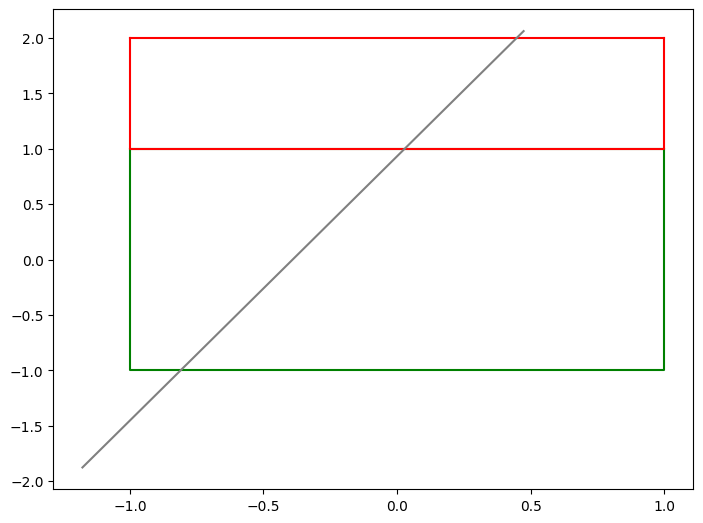

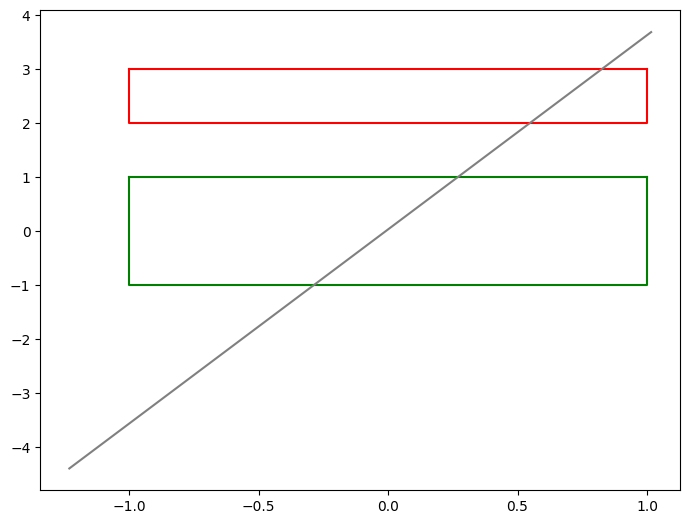

In [25]:
s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 2, -1, 2, -1, 1])
import matplotlib.pyplot as plt
from utils import draw_row

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_row(model, ax, s1)
plt.show()

s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 2, 1, 3, -1, 3, -1, 2])
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_row(model, ax, s1)
plt.show()


### Do the training



In [26]:
from typing import Tuple
import math

from tensorflow.keras.metrics import MeanSquaredError

model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.MeanSquaredError(name="train_loss"),
    weighted_metrics=[
        MeanSquaredError(name='train_mean_loss')
    ],
)

BATCH_SIZE = 1000


def gen_generator(inpts: np.ndarray, outs: np.ndarray, train=True, bs=BATCH_SIZE):
    def generator() -> Iterator[Tuple[tf.Tensor, tf.Tensor, tf.Tensor]]:
        indexes = np.arange(inpts.shape[0])
        np.random.shuffle(indexes)
        train_size = math.ceil(inpts.shape[0] * 9 / 10)
        train_indexes = indexes[0:train_size]
        test_indexes = indexes[train_size:-1]

        def read_batches(idx: np.ndarray, bs=bs) -> Iterator[
            Tuple[tf.Tensor, tf.Tensor, tf.Tensor]]:
            for i in range(0, idx.shape[0], bs):
                ii = idx[i:(i + bs)]
                r = bs - len(ii)
                x = inpts[ii]
                x = np.pad(x, ((0, r), (0, 0)), mode="constant", constant_values=[0])
                y = outs[ii]
                y = np.pad(y, ((0, r), (0, 0)), mode="constant", constant_values=[0])
                w = np.append(np.ones(len(ii)), np.zeros(r))
                yield tf.convert_to_tensor(x), tf.convert_to_tensor(y), tf.convert_to_tensor(w)

        if train:
            return read_batches(train_indexes)
        else:
            return read_batches(test_indexes)

    return generator()


data = tf.data.Dataset.from_generator(gen_generator,
                                      args=[prepared_input, prepared_output, True, BATCH_SIZE],
                                      output_signature=(
                                          tf.TensorSpec(shape=(BATCH_SIZE, model.input_shape[1]),
                                                        dtype=tf.float32),
                                          tf.TensorSpec(shape=(BATCH_SIZE, model.output_shape[1]),
                                                        dtype=tf.float32),
                                          tf.TensorSpec(shape=(BATCH_SIZE,), dtype=tf.float32)
                                      ))
val_data = tf.data.Dataset.from_generator(gen_generator,
                                          args=[prepared_input, prepared_output, False, BATCH_SIZE],
                                          output_signature=(
                                              tf.TensorSpec(
                                                  shape=(BATCH_SIZE, model.input_shape[1]),
                                                  dtype=tf.float32),
                                              tf.TensorSpec(
                                                  shape=(BATCH_SIZE, model.output_shape[1]),
                                                  dtype=tf.float32),
                                              tf.TensorSpec(shape=(BATCH_SIZE,), dtype=tf.float32)
                                          ))

res = model.fit(x=data, epochs=100, validation_data=val_data)

Epoch 1/100
    512/Unknown - 3s 6ms/step - loss: 2.8541 - train_mean_loss: 2.8541

2024-01-01 13:51:25.809849: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7155816046694469825
2024-01-01 13:51:25.809865: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16074546537136220933
2024-01-01 13:51:25.809869: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12813344233644390053
2024-01-01 13:51:25.809877: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2308045245449619850


519/519 [==============================] - 3s 6ms/step - loss: 2.8177 - train_mean_loss: 2.8210 - val_loss: 0.1665 - val_train_mean_loss: 0.1677
Epoch 2/100
 30/519 [>.............................] - ETA: 2s - loss: 0.1561 - train_mean_loss: 0.1561

2024-01-01 13:51:26.193381: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7155816046694469825
2024-01-01 13:51:26.193402: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7822981300042502839
2024-01-01 13:51:26.193411: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11009096397493376720


519/519 [==============================] - 3s 6ms/step - loss: 0.0698 - train_mean_loss: 0.0699 - val_loss: 0.0259 - val_train_mean_loss: 0.0261
Epoch 3/100
519/519 [==============================] - 3s 6ms/step - loss: 0.0156 - train_mean_loss: 0.0156 - val_loss: 0.0094 - val_train_mean_loss: 0.0094
Epoch 4/100
519/519 [==============================] - 3s 6ms/step - loss: 0.0068 - train_mean_loss: 0.0068 - val_loss: 0.0048 - val_train_mean_loss: 0.0049
Epoch 5/100
519/519 [==============================] - 3s 6ms/step - loss: 0.0037 - train_mean_loss: 0.0037 - val_loss: 0.0027 - val_train_mean_loss: 0.0027
Epoch 6/100
519/519 [==============================] - 3s 6ms/step - loss: 0.0021 - train_mean_loss: 0.0021 - val_loss: 0.0015 - val_train_mean_loss: 0.0015
Epoch 7/100
519/519 [==============================] - 3s 6ms/step - loss: 0.0012 - train_mean_loss: 0.0012 - val_loss: 8.4924e-04 - val_train_mean_loss: 8.5515e-04
Epoch 8/100
519/519 [==============================] - 3s 6ms/

## Plot stats

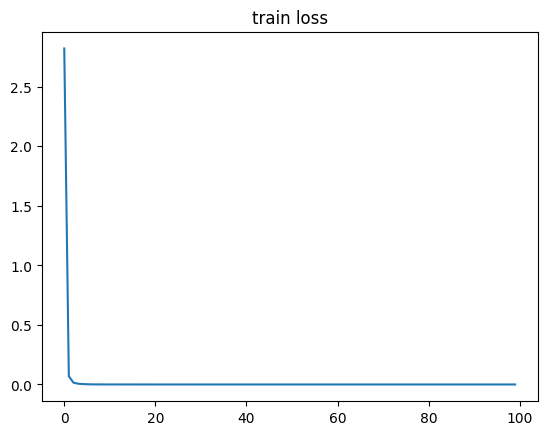

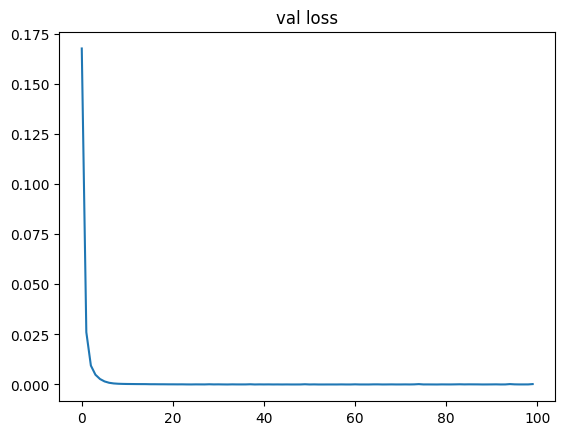

In [30]:
%matplotlib inline


plt.title("train loss")
plt.plot(res.history['train_mean_loss'])
plt.show()
plt.title("val loss")
plt.plot(res.history['val_train_mean_loss'])
plt.show()

#### Some random tests

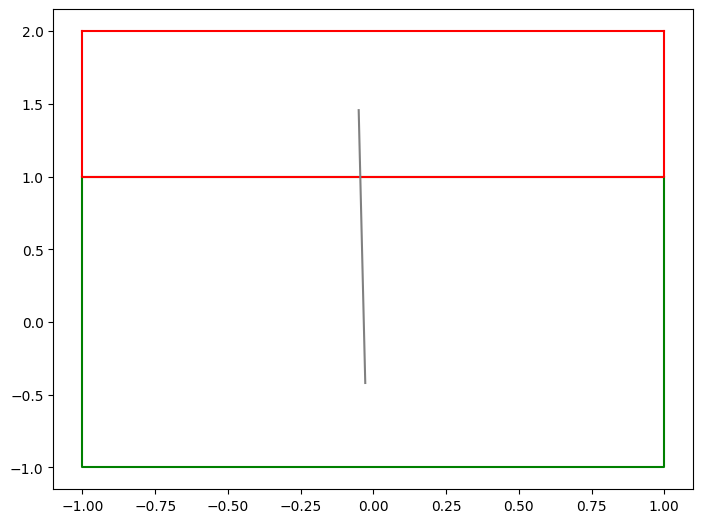

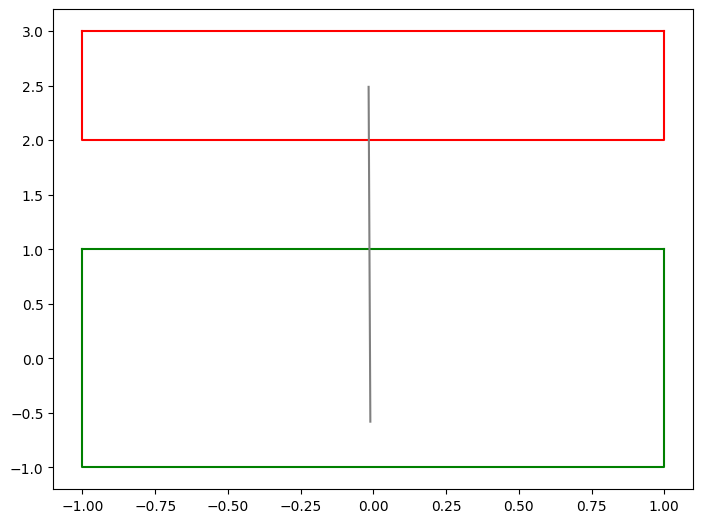

In [31]:
s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 2, -1, 2, -1, 1])

from utils import draw_row

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_row(model, ax, s1)
plt.show()

s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 2, 1, 3, -1, 3, -1, 2])
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_row(model, ax, s1)
plt.show()


In [32]:
model.save(datadir("model_rot_compiled"))

INFO:tensorflow:Assets written to: model_rot_compiled/assets


INFO:tensorflow:Assets written to: model_rot_compiled/assets
